In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
bert_d_1 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_d_bert_ds6_fold1_results.csv')
bert_d_2 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_d_bert_ds5_fold2_results_v2.csv')
bert_d_3 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_d_bert_ds4_fold3_results.csv')
bert_d_4 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_d_bert_ds3_fold4_results.csv')
bert_d_5 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_d_bert_ds2_fold5_results.csv')
bert_d_6 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_d_bert_ds1_fold6_results.csv')
bert = pd.concat((bert_d_1, bert_d_2, bert_d_3, bert_d_4, bert_d_5, bert_d_6), axis=0)

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(bert['exp'], bert['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(bert['exp'], bert['predict'])))

# R^2 Coefficient of Determination
print(r2_score(bert['exp'], bert['predict']))

0.6667116990701606
0.9706844378153598
0.7075256301719539


In [4]:
len(bert)

1183

In [5]:
bert['residual']= bert['predict']-bert['exp']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((bert['residual']**2).sum()/(len(bert)-2))
sdr

0.9715060075246973

In [7]:
bert['std_residual'] = bert['residual']/sdr
bert['std_residual']

0      0.279154
1      0.962217
2     -0.222333
3      0.311986
4      0.194822
         ...   
193   -0.249669
194    0.950110
195   -1.256645
196   -0.179395
197   -0.140199
Name: std_residual, Length: 1183, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
bert_outliers = bert.loc[abs(bert['std_residual']) > n]
bert_outliers

,Unnamed: 0,smiles,exp,predict,residual,std_residual
104,104,CC(CCl)OC(C)CCl,19.0,14.579849,-4.420151,-4.549793
10,10,OC(F)(C(F)F)C(F)(F)F,17.2,12.990216,-4.209784,-4.333256
151,151,NC(=O)NC(N)=O,20.0,17.015900,-2.984100,-3.071623
156,156,CN=C=S,17.3,13.931469,-3.368531,-3.467329
40,40,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,11.3,14.574512,3.274512,3.370552
51,51,[O-][O+]=O,19.8,14.640075,-5.159925,-5.311264
74,74,N#CSC#N,18.1,8.293100,-9.806900,-10.094534
118,118,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)F,10.6,13.782772,3.182772,3.276122
163,163,ClCCOCCCl,18.8,15.693995,-3.106006,-3.197104
182,182,OCCO.O[S](O)=O,20.0,16.711084,-3.288916,-3.385379


In [12]:
# Set the default text font size
plt.rc('font', size=22)

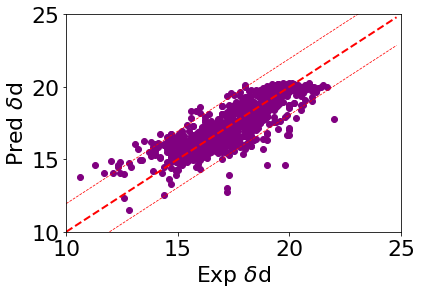

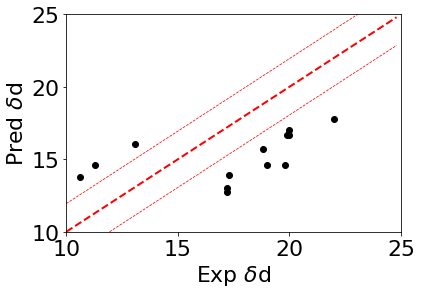

In [19]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['exp'], y=bert['predict'], color='purple')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers['exp'], y=bert_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

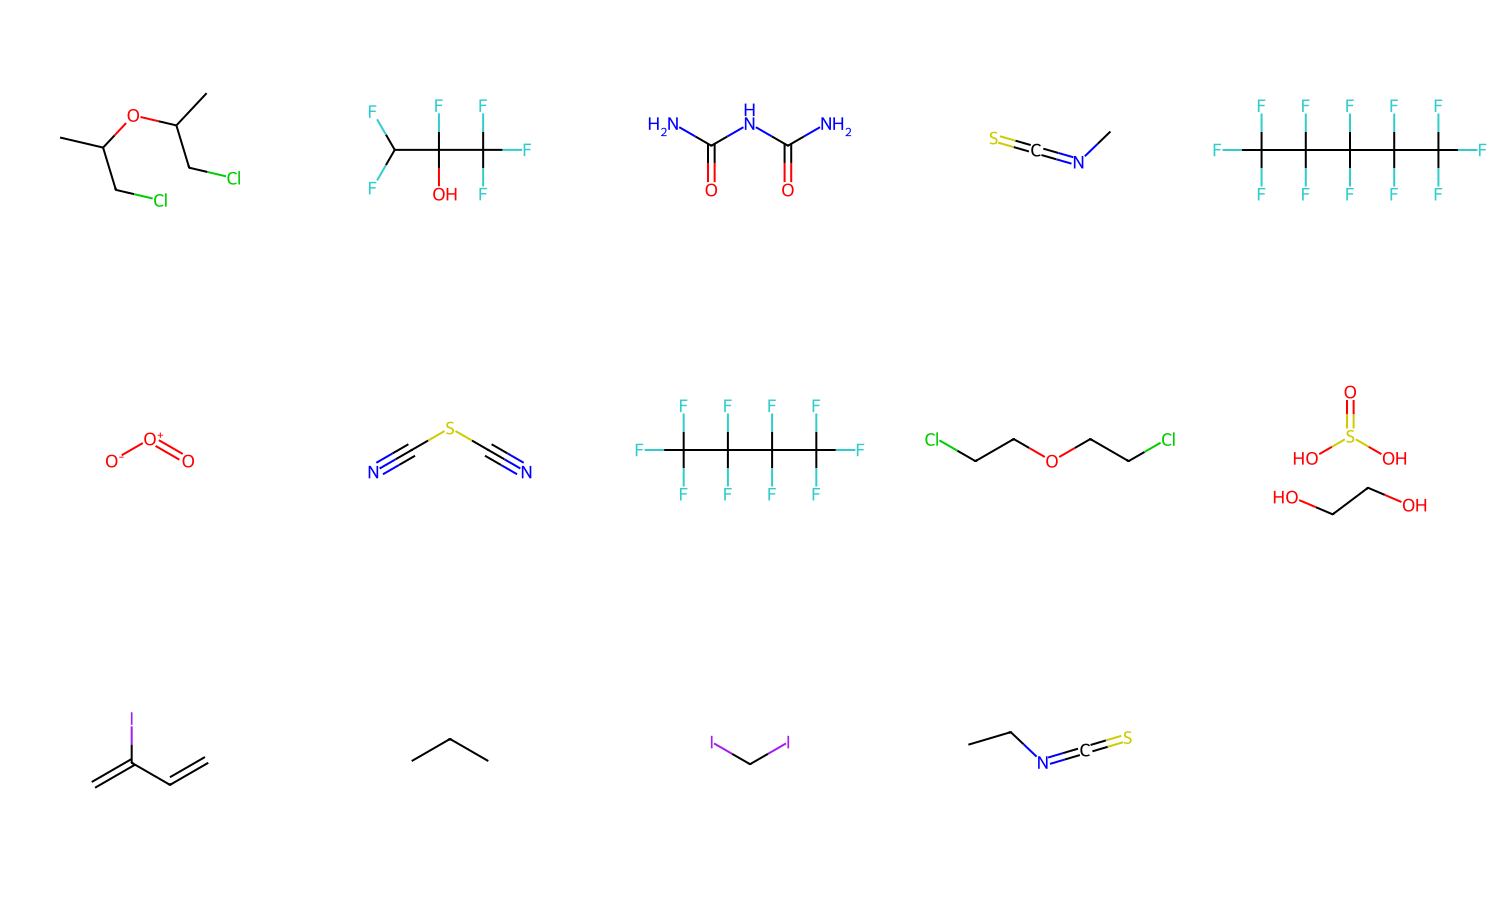

In [20]:
outliners = [Chem.MolFromSmiles(x) for x in bert_outliers['smiles']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [21]:
bert_outliers.to_csv('bert2_d_outliers3.csv')

In [22]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
bert_outliers2 = bert.loc[abs(bert['std_residual']) > n]
bert_outliers2

,Unnamed: 0,smiles,exp,predict,residual,std_residual
13,13,CC1COC(=O)O1,20.0,17.157470,-2.842530,-2.925901
104,104,CC(CCl)OC(C)CCl,19.0,14.579849,-4.420151,-4.549793
119,119,CC(C)(C)Cl,15.6,17.846909,2.246909,2.312810
141,141,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C,12.2,9.555378,-2.644622,-2.722188
175,175,C#N,12.3,14.581927,2.281927,2.348855
...,...,...,...,...,...,...
79,79,BrC#N,18.3,15.950647,-2.349353,-2.418259
90,90,CCC,13.1,16.025822,2.925822,3.011636
96,96,CCC(C)C,13.8,16.205710,2.405710,2.476269
148,148,ICI,22.0,17.778116,-4.221884,-4.345711


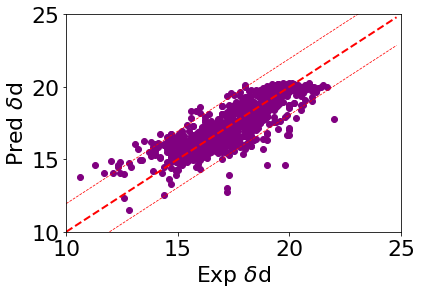

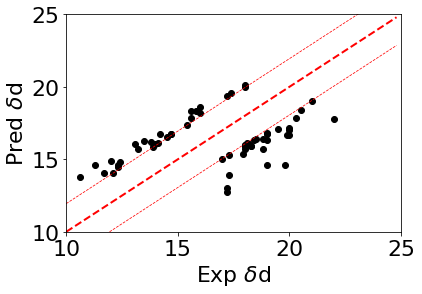

In [23]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['exp'], y=bert['predict'], color='purple')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers2['exp'], y=bert_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

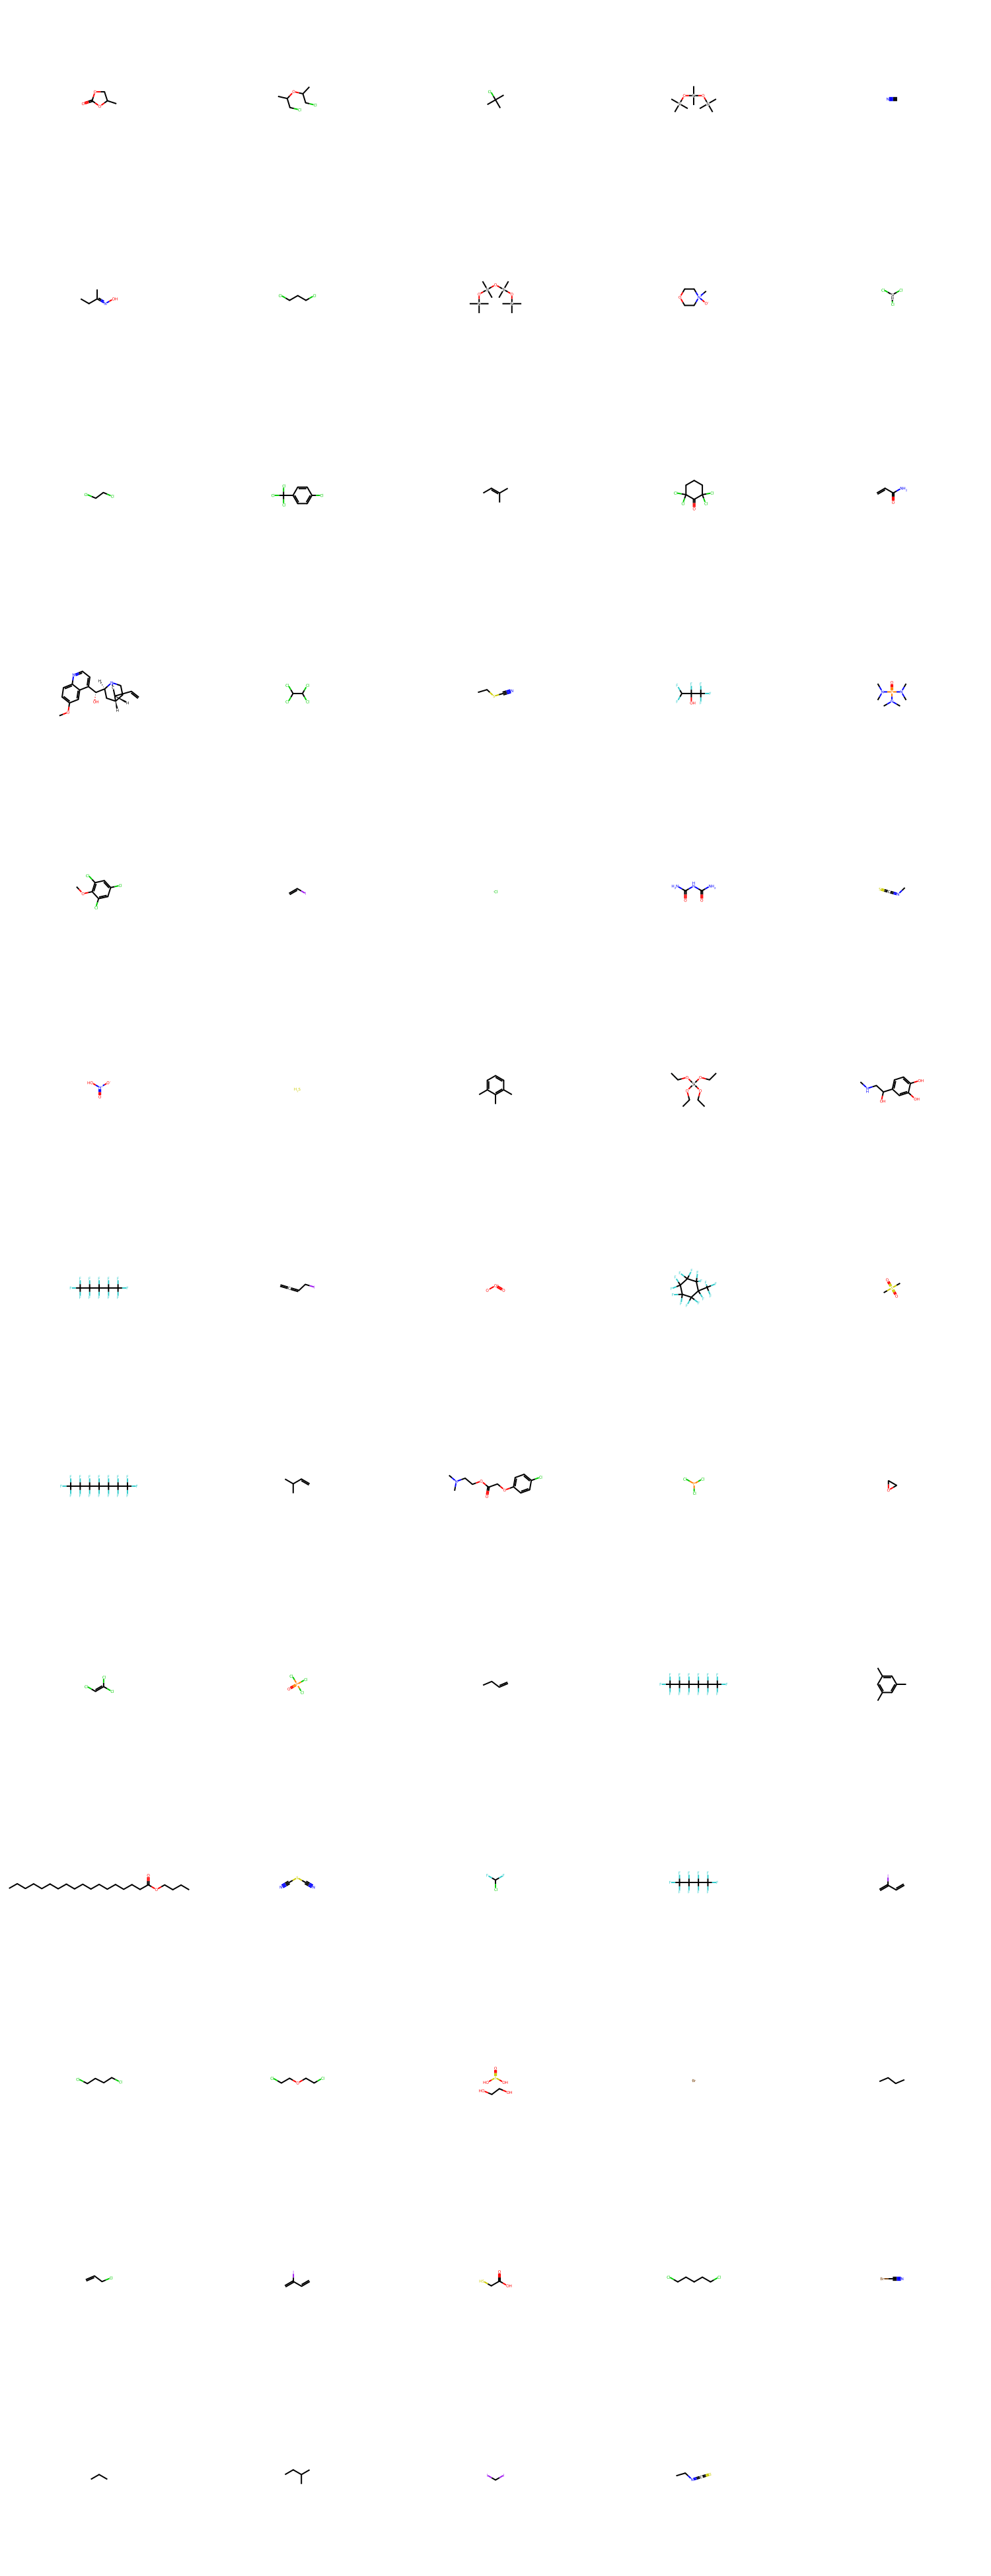

In [18]:
outliners2 = [Chem.MolFromSmiles(x) for x in bert_outliers2['smiles']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [17]:
bert_outliers2.to_csv('bert2_d_outliers2.csv')

In [18]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in bert_outliers2['smiles']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
146.68111756374998


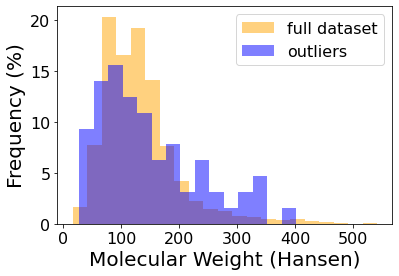

In [19]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()